KNN - MAGIC Gamma Telescope

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

The next cell the the dataset column names and their adjustment and length

In [30]:
column_names = [
    "fLength", "fWidth", "fSize", "fConc", "fConc1",
    "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"
]

dataset = pd.read_csv(r'D:\term 7\machine learning\ML- Assignment 1\ML- Assignment 1\magic04.data', header=None, names=column_names)
print(len(dataset))
dataset.head()


19020


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


[6]Here we are using pandas library to read our data from the magic04.data file
  [1] We defined column names and I added for the column that classify whether g or h name class to classify upon this column

Separate dataset into features and labels

In [31]:
x=dataset.drop(['class'],axis=1)
y=dataset['class']

see data distribution

In [32]:
y.value_counts()


class
g    12332
h     6688
Name: count, dtype: int64

<Axes: ylabel='count'>

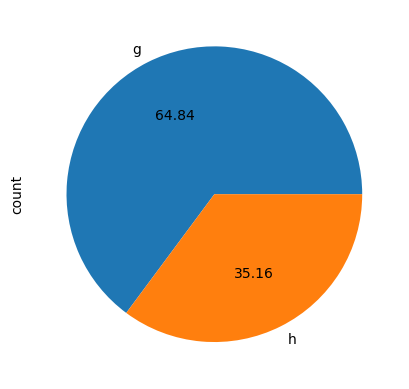

In [33]:
y.value_counts().plot.pie(autopct='%.2f')

The data diagram is unbalaced and we have to start balancing
the dataset with equal samples for each class so no biasing happens

In [34]:
#rus=RandomUnderSampler(sampling_strategy=1)
#x_res,y_res=rus.fit_resample(x,y)

gamma_data = dataset[dataset['class'] == 'g']
hadron_data = dataset[dataset['class'] == 'h']
gamma_sampled = gamma_data.sample(n=len(hadron_data), random_state=42)
balanced_data = pd.concat([gamma_sampled, hadron_data])
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
x_res=balanced_data.drop(['class'],axis=1)
y_res=balanced_data['class']

# Display the balanced class counts to verify
print(balanced_data['class'].value_counts())

class
h    6688
g    6688
Name: count, dtype: int64


[4] & [5] Separate gamma and hadron classes based on the column called class
It is the column where it specifies whether g or h
[6]Here take from the gamma class part of it which has the same size of the hadron class
 To make sure that our data is balanced and wouldn't cause bias
Random state insures that you are taking your random data from specific point
 To make sure that everytime we run the code we select our data from the same point
 [7] We are merging the 2 classes together the balanced gamma class and the hadron class
see the data distribution after balancing

class
h    6688
g    6688
Name: count, dtype: int64

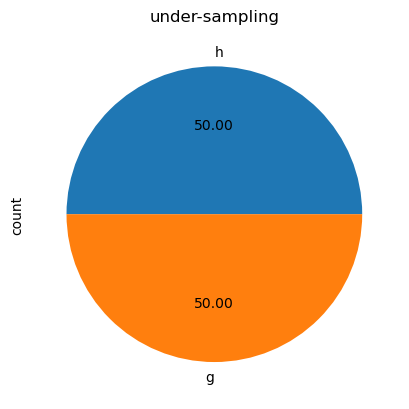

In [35]:
ax=balanced_data['class'].value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("under-sampling")
balanced_data['class'].value_counts()

Split data and see the dataset numbers
The data is now balanced

In [36]:
# First, split off 70% for training, leaving 30% in the temporary set (for validation and testing)
x_train, x_temp, y_train, y_temp = train_test_split(x_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# Second, split the temporary set into 50% validation and 50% test sets
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Training set size:", x_train.shape[0])
print("Validation set size:", x_val.shape[0])
print("Testing set size:", x_test.shape[0])


Training set size: 9363
Validation set size: 2006
Testing set size: 2007


This train_test_split data 70% train data and 30% temp data that will be split
This split temp data to two equal parts part for val and other for testing
Normalize dataset and view the train dataset

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val) 

x_train_normalized = pd.DataFrame(x_train, columns=x.columns)
x_test_normalized = pd.DataFrame(x_test, columns=x.columns)
x_train_normalized.head()



,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,-0.674653,0.034940,-0.122973,-0.127442,0.448276,0.218827,0.144165,-0.707749,-0.096769,-0.970076
1,-0.718857,-0.301851,-0.321845,-0.300181,-0.371860,-0.671620,0.420688,0.725489,-0.465373,0.765488
2,-0.849051,-0.604688,-1.118386,1.109436,1.127102,0.137079,-0.237871,0.273081,0.020952,0.689586
3,0.336803,0.262444,1.201441,-0.326255,-0.415684,-0.384332,0.605617,-0.479026,-1.019167,2.078033
4,1.360068,4.102597,2.453959,-1.329012,-1.364608,0.345371,-0.881816,-3.889243,2.133065,1.872754


show the test dataset after normalizing
After splitting the data we took each data group and started to normalize it so that all our values are between 0 and 1 to avoid outliers

In [38]:
x_test_normalized.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,-0.653491,-0.610788,-0.930866,0.824797,1.168243,0.238861,0.176638,-0.443504,0.479847,-0.837996
1,-0.759484,-0.558709,-0.728840,0.878574,0.899038,0.523202,0.022989,0.227793,-0.988790,0.360341
2,0.382777,-0.305999,0.589898,-0.742894,-0.749283,0.107712,0.746915,0.487793,0.148187,0.954252
3,-0.585382,-0.818469,-1.363298,0.796007,0.516248,-0.466008,-0.350714,-0.069763,0.210024,-0.776124
4,1.426304,1.548795,3.313147,-1.760860,-1.667799,1.048372,1.617822,1.691802,-0.873921,0.845862


show the validate dataset after normalizing

In [39]:
x_val_normalized = pd.DataFrame(x_val, columns=x.columns)
x_val_normalized.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,-0.657713,-0.633388,-0.501377,0.988845,0.990263,0.586748,0.173223,-0.409929,-0.338409,0.641320
1,-0.221725,-0.329940,0.421719,-0.550599,-0.528374,0.070409,0.599055,0.387912,-1.000900,0.154734
2,-0.667278,-0.598738,-0.310914,0.690082,0.840904,0.169750,0.203187,0.292108,-1.030247,-0.121906
3,-0.686709,-0.318150,-0.549098,0.125148,-0.027528,0.187883,-0.398926,-0.387884,-0.578751,-0.743381
4,1.044716,0.234850,1.190720,-1.243729,-1.119552,-1.775412,1.322163,0.799356,-0.976386,0.574922


Define the model : Init K-NN
Here we return the data back in the form of data frame

In [40]:
k_values = range(1,30)  # Trying a wider range of k values from 1 to 30
training_accuracy=[]
validation_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_normalized, y_train)
    training_accuracy.append(knn.score(x_train_normalized, y_train))
    validation_accuracy.append(knn.score(x_val_normalized, y_val))
    

we will start trying different k values 
[7]we train the model using KNN drop to drop the target column then fit data
I give it the column containing the correct answers and the data
The function knn.score calculates the portion of the correct answers

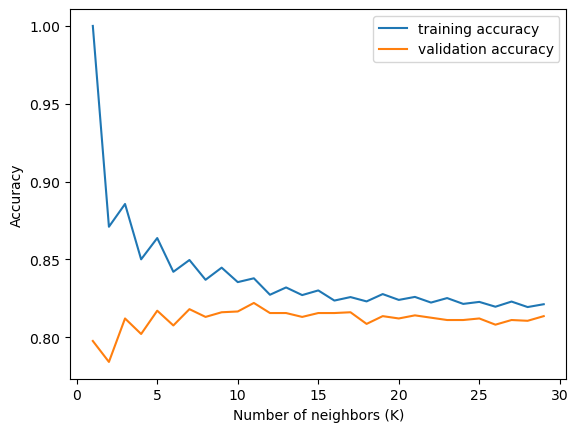

In [41]:
plt.plot(k_values,training_accuracy,label="training accuracy")
plt.plot(k_values,validation_accuracy,label="validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors (K)")
plt.legend()


In [42]:
best_k_index = validation_accuracy.index(max(validation_accuracy))
best_k = k_values[best_k_index]

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(x_train_normalized, y_train)
y_test_pred = final_knn.predict(x_test_normalized)

test_accuracy1 = final_knn.score(x_test_normalized, y_test)
test_accuracy2 = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label='g', zero_division=1)
test_recall = recall_score(y_test, y_test_pred, pos_label='g', zero_division=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label='g', zero_division=1)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print("Evaluation on Test Set:")
print(f"Best k value is: {best_k}")
print(f"Test Accuracy with best k: {test_accuracy1 * 100:.2f}%")
print(f"Test Accuracy with best k: {test_accuracy2 * 100:.2f}%")
print(f"Precision: {test_precision * 100:.2f}%")
print(f"Recall: {test_recall * 100:.2f}%")
print(f"F1 Score: {test_f1 * 100:.2f}%")
print("Confusion Matrix:")
print(test_confusion_matrix)


Evaluation on Test Set:
Best k value is: 11
Test Accuracy with best k: 82.66%
Test Accuracy with best k: 82.66%
Precision: 78.32%
Recall: 90.34%
F1 Score: 83.90%
Confusion Matrix:
[[907  97]
 [251 752]]


Here we calculated the best k that got the best accuracy in the validation data 
we used this k for our knn model 
we entered the test data and calculated accuracy, precision, recall, f1 and the cofusion matrix
The function accuracy_score calculates the portion of the correct answers
The function precision_score calculates the ratio of the correct answers to the total predicted answers
The function recall_score calculates the ratio of the results saying it is glass  to the actual g glass
The function f1_score balance correctly identified samples and minimizing false outputs
 The confusion matrix is Matrix containing true g positives, true h negatives, false g positives, false h negatives